In [49]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
# import dataset
user_profile = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical_Non_Unique.csv")
user_profile

,Unnamed: 0,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
0,0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
1,1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
2,2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
3,3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
4,4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2589,2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2590,2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2591,2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.75,,0.15625,LOW


In [52]:
user_profile.columns

Index(['Unnamed: 0', 'Phone_Number.hash', 'Peo_TV_Package',
       'usage_08_20 (hh:mm)', 'usage_07_20 (hh:mm)', 'usage_06_20 (hh:mm)',
       'usage_05_20 (hh:mm)', 'usage04_20 (hh:mm)', 'usage_03_20 (hh:mm)',
       'usage_02_20 (hh:mm)', 'usage_01_20 (hh:mm)', ' ',
       'Usage_Rating_Scaled', 'Usage_Rating_Categorical'],
      dtype='object')

In [53]:
data=user_profile.iloc[:,[1,2,12]]
data

,Phone_Number.hash,Peo_TV_Package,Usage_Rating_Scaled
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.93750
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.93750
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.40625
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.40625
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75000
...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75000
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.78125
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.78125
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.15625


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phone_Number.hash    2593 non-null   object 
 1   Peo_TV_Package       2593 non-null   object 
 2   Usage_Rating_Scaled  2593 non-null   float64
dtypes: float64(1), object(2)
memory usage: 60.9+ KB


In [55]:
# total number of unique users
data['Phone_Number.hash'].nunique()


1428

In [56]:
# total number of unique peo tv package
data['Peo_TV_Package'].nunique()


22

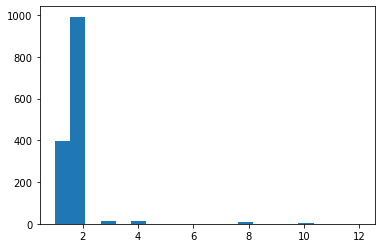

In [76]:
# create a histogram of all the interactions by all the users present in the dataset
interactions = data.groupby('Phone_Number.hash').count()['Peo_TV_Package']
plt.hist(interactions,bins=20)
plt.show()

## Interaction Matrix

In [60]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 
interactions_metrix = data.pivot_table(index="Phone_Number.hash", columns="Peo_TV_Package", values="Usage_Rating_Scaled")
interactions_metrix

Peo_TV_Package,BOC,DOUBLEPROMO,LEISURE_SPORTS,LOTUS,NEW_SLT_STAFF_PACKAGE,NEW_YEAR_TREAT,PEO_ENTERTAINMENT,PEO_FAMILY,PEO_GOLD,PEO_PLATINUM,...,PEO_SILVER_FTTH,PEO_SILVER_PLUS,PEO_SILVER_PLUS_FTTH,PEO_TITANIUM,PEO_UNNATHAM,PEO_UTHAYAM,PRANAMA,SLTStaff_PEO_SILVER,SLT_STAFF_PEO_UNNATHAM_FTTH,SLT_STAFF_TRIPLE_PLAY
Phone_Number.hash,,,,,,,,,,,,,,,,,,,,,
00567a4a3c474aca1ce5cd6570648932,NaN,NaN,NaN,NaN,NaN,NaN,0.625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00c67d66625de3ab6a003af1935c53bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00cc5a820586ce291c0fa4c2a99a4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00cdc20b1406e0a11c7500d5ef716d20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00cdeaab12b17d169d170538c9af9594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb2ec238eba276f65157693ed329c7f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffb9cb2e838925de5a75764fd59c6ea1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffd697d66cc01c8897ce3e37d693673a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
interactions_metrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 00567a4a3c474aca1ce5cd6570648932 to fff2221d1365d22d2d08285f2b9fd303
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BOC                          5 non-null      float64
 1   DOUBLEPROMO                  2 non-null      float64
 2   LEISURE_SPORTS               1 non-null      float64
 3   LOTUS                        2 non-null      float64
 4   NEW_SLT_STAFF_PACKAGE        9 non-null      float64
 5   NEW_YEAR_TREAT               6 non-null      float64
 6   PEO_ENTERTAINMENT            18 non-null     float64
 7   PEO_FAMILY                   1 non-null      float64
 8   PEO_GOLD                     6 non-null      float64
 9   PEO_PLATINUM                 4 non-null      float64
 10  PEO_RELIGIOUS_PACKAGE        4 non-null      float64
 11  PEO_SILVER                   995 non-null    float64
 12  PEO_SILVER_FTTH       

In [62]:
# replace all the missing values with zero
interactions_metrix = interactions_metrix.fillna(0)

In [63]:
interactions_metrix.sample(n=10)

Peo_TV_Package,BOC,DOUBLEPROMO,LEISURE_SPORTS,LOTUS,NEW_SLT_STAFF_PACKAGE,NEW_YEAR_TREAT,PEO_ENTERTAINMENT,PEO_FAMILY,PEO_GOLD,PEO_PLATINUM,...,PEO_SILVER_FTTH,PEO_SILVER_PLUS,PEO_SILVER_PLUS_FTTH,PEO_TITANIUM,PEO_UNNATHAM,PEO_UTHAYAM,PRANAMA,SLTStaff_PEO_SILVER,SLT_STAFF_PEO_UNNATHAM_FTTH,SLT_STAFF_TRIPLE_PLAY
Phone_Number.hash,,,,,,,,,,,,,,,,,,,,,
d902736e194c5c4cb8d2ba17f549f40a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.87500,0.0,0.0,0.0,0.0
98cd69445e93e1444ede642a4e0247be,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4db66836506854167001d2d79057150f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0
3dfa13b8dfa415d584b467a463c68b7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.81250,0.0,0.0,0.0,0.0
286ae14a02441135faa18da8b6ceaf19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
5ffdd832b55df874ade5e6cb44fb4c10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.59375,0.0,0.0,0.0,0.0
25bb001a9a7d38b64b7c97d98b82ef73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
f16592e796be208a4f35ab35acb6a0e8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
0541411ea78d692ada524e8734da6bb2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


## Finding similar users

In [64]:
users = data["Phone_Number.hash"].values

In [65]:
# using cosine_similarity from sklearn
def similar_users(user_id, interactions_matrix):
    
    # compute similarity of each user to the provided user
    similarity = []
    for user in users:
        sim = cosine_similarity([interactions_metrix.loc[user_id]], [interactions_metrix.loc[user]])
        similarity.append((user, sim))
    
    # sort by similarity
    similarity.sort(key=lambda x: x[1], reverse=True)
    
    # create list of just the user ids
    most_similar_users = [tup[0] for tup in similarity]
    
    # create list of similarity score
    similarity_score = [tup[1] for tup in similarity]
    
    # remove the user's own id
    most_similar_users.remove(user_id)
    
    # remove the user's own similarity score
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [66]:
# check the implemented function above 
#[0] is here to get first returned element of the function (most_similar_users)
#[:5] is to get the first 3 (the 3 most) similar users only
similar_users("d3fa5324ea875cf72e4f6718adec2f01", interactions_metrix)[0][:3]


['71d08664b609dcaddf02d6ffc2532aa7',
 '71d08664b609dcaddf02d6ffc2532aa7',
 'f98bd7d6c96317fc2656bc43441df8bb']

In [67]:
# this gives similarity scores ( how similar a user to a given user)
similar_users('d3fa5324ea875cf72e4f6718adec2f01', interactions_metrix)[1][:3]


[array([[1.]]), array([[1.]]), array([[1.]])]

## similarity based collaborative recommendation system

In [68]:
def recommendations(user_id, num_of_packages, user_item_interactions):
    # find the most similar users to the user_id for which we want to recommend packages
    most_similar_users = similar_users(user_id, user_item_interactions)[0]
    
    # find out those packages which this user has already interacted with
    packages = set(list(interactions_metrix.columns[np.where(interactions_metrix.loc[user_id]>0)]))
    
    # create an empty list to store the recommended packages
    recommendations = []
    
    # copy those packages which are already interacted by user_id
    already_interacted = packages.copy()
    
    # loop through each similar user from the list of most_similar_users
    for similar_user in most_similar_users:
        
        # implement the below code till the length of recommended packages does not become equal to num_of_packages
        if len(recommendations) < num_of_packages:
            
            # store all the movies interacted by each similar user to user_id
            similar_user_packages = set(list(interactions_metrix.columns[np.where(interactions_metrix.loc[similar_user]>0)]))
            
            # add those movies in the recommended list which are present in similar_user_packages but not present in already_interacted
            recommendations.extend(list(similar_user_packages.difference(already_interacted)))
            
            # now add all those packages into already_interacted which we already added in recommendations
            already_interacted = already_interacted.union(similar_user_packages)
            
        else:
            break
    
    return recommendations[:num_of_packages]

In [69]:
# check recommendations
recommendations('d3fa5324ea875cf72e4f6718adec2f01',3, interactions_metrix)

['PEO_UTHAYAM', 'PRANAMA', 'PEO_ENTERTAINMENT']